In [1]:
# manipulation des données
import numpy as np
import pandas as pd

# matplotlib et seaborn pour les représentations graphiques
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# sklearn preprocessing pour le traiter les variables catégorielles
from sklearn.preprocessing import LabelEncoder

# Gestion du système de fichiers
import os

# Suppression des alertes
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("../Data/1.normalized_dataset_completed.csv")

In [3]:
df['cluster'] = 0
df.loc[df['product_category_tree'] == 'Home Furnishing', 'cluster'] = 0
df.loc[df['product_category_tree'] == 'Baby Care', 'cluster'] = 1
df.loc[df['product_category_tree'] == 'Watches', 'cluster'] = 2
df.loc[df['product_category_tree'] == 'Home Decor & Festive Needs', 'cluster'] = 3
df.loc[df['product_category_tree'] == 'Kitchen & Dining', 'cluster'] = 4
df.loc[df['product_category_tree'] == 'Beauty and Personal Care', 'cluster'] = 5
df.loc[df['product_category_tree'] == 'Computers', 'cluster'] = 6

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

df['words'] = df['words'].astype(str)
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['words'])

feature_names = vectorizer.get_feature_names_out()

df_tfidf = pd.DataFrame(data=X.toarray(), columns=feature_names)
df_tfidf = pd.concat([df['words'], df_tfidf], axis=1)

In [5]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=7, random_state=42)
df['cluster_predict'] = kmeans.fit_predict(X)

In [6]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X.toarray())

df['tsne_1'] = X_tsne[:, 0]
df['tsne_2'] = X_tsne[:, 1]

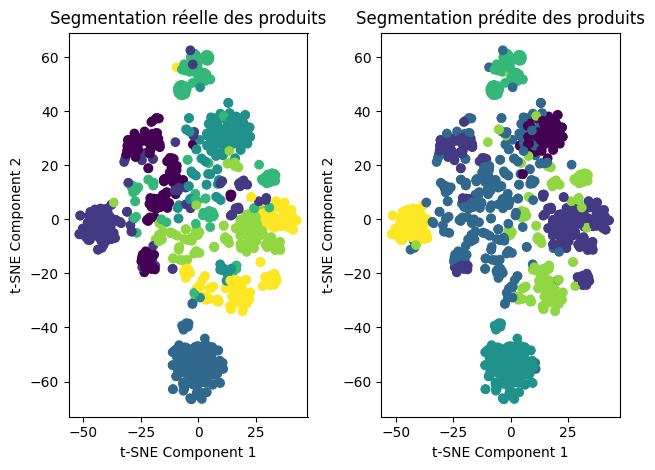

In [7]:
plt.subplot(1, 2, 1)
plt.scatter(df['tsne_1'], df['tsne_2'], c=df['cluster'], cmap='viridis')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('Segmentation réelle des produits')

plt.subplot(1, 2, 2)
plt.scatter(df['tsne_1'], df['tsne_2'], c=df['cluster_predict'], cmap='viridis')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('Segmentation prédite des produits')

plt.tight_layout()
plt.show()